In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 1.1 Exploratory data Analysis

### a) Obtain the histograms of both salary and the logarithm (natural base) of salary and comment. Proceed with the log-transformed salary from this step on.

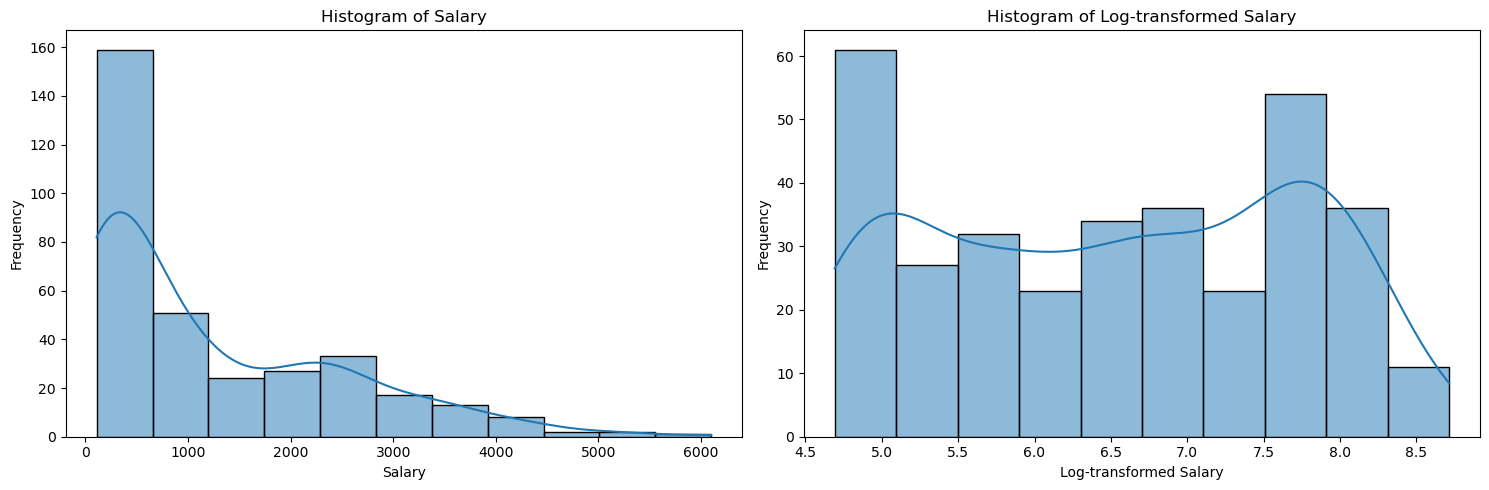

In [8]:
baseball_data = pd.read_table('http://jse.amstat.org/datasets/baseball.dat.txt',
                             header = None, sep="\s+",
                             names=["salary", "batting.avg", "OBP", "runs", "hits",
"doubles", "triples", "homeruns", "RBI", "walks", "strike.outs",
"stolen.bases", "errors", "free.agency.elig", "free.agent.91",
"arb.elig", "arb.91", "name"])
baseball_data.head()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the original salary distribution
sns.histplot(baseball_data['salary'], ax=ax1, kde=True)
ax1.set_title('Histogram of Salary')
ax1.set_xlabel('Salary')
ax1.set_ylabel('Frequency')

# Plot the log-transformed salary distribution
sns.histplot(np.log(baseball_data['salary']), ax=ax2, kde=True)
ax2.set_title('Histogram of Log-transformed Salary')
ax2.set_xlabel('Log-transformed Salary')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### The left graph(salary) is right-skewed which means there are few players that have high salary. On the other hand, the right graph, log-transformed, is distributed normally which indicates that the variance is stabilized. This helps in linear regression.

### b) Inspect the data and answer these questions: Are there any missing data? Among all the predictors, how many of them are continuous, integer counts, and categorical, respectively?


In [79]:
missing_values = baseball_data.isna().sum()
missing_values

salary              0
batting.avg         0
OBP                 0
runs                0
hits                0
doubles             0
triples             0
homeruns            0
RBI                 0
walks               0
strike.outs         0
stolen.bases        0
errors              0
free.agency.elig    0
free.agent.91       0
arb.elig            0
arb.91              0
name                0
dtype: int64

#### We can see form the data that there are no missing data

In [80]:
# we are trying to see the data types now
baseball_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salary            337 non-null    int64  
 1   batting.avg       337 non-null    float64
 2   OBP               337 non-null    float64
 3   runs              337 non-null    int64  
 4   hits              337 non-null    int64  
 5   doubles           337 non-null    int64  
 6   triples           337 non-null    int64  
 7   homeruns          337 non-null    int64  
 8   RBI               337 non-null    int64  
 9   walks             337 non-null    int64  
 10  strike.outs       337 non-null    int64  
 11  stolen.bases      337 non-null    int64  
 12  errors            337 non-null    int64  
 13  free.agency.elig  337 non-null    int64  
 14  free.agent.91     337 non-null    int64  
 15  arb.elig          337 non-null    int64  
 16  arb.91            337 non-null    int64  
 1

#### The output above tells us that all the columns except "name" are either continuous or integer values. Regardless of the output, we will still analyze the date further to identify if some of the other columns are categorical.

In [19]:
baseball_data.head()

,salary,batting.avg,OBP,runs,hits,doubles,triples,homeruns,RBI,walks,strike.outs,stolen.bases,errors,free.agency.elig,free.agent.91,arb.elig,arb.91,name
0,3300,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0,Andre Dawson
1,2600,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0,Steve Buchele
2,2500,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0,Kal Daniels
3,2475,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0,Shawon Dunston
4,2313,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0,Mark Grace


#### After further analyzing the data we can see that name is a categorical data for sure. ON the other hand, free.agency.elig, free.agent.91, arb.elig and arb.91 only seem to contain the values of 0 and 1 for the first 10 entries. This leads me to stipulate that these might also be categorical. We can confirm this by counting each entries in these columns

In [81]:
columns = ['free.agency.elig', 'free.agent.91', 'arb.elig', 'arb.91']
for col in columns:
    print(baseball_data[col].value_counts())


0    203
1    134
Name: free.agency.elig, dtype: int64
0    298
1     39
Name: free.agent.91, dtype: int64
0    272
1     65
Name: arb.elig, dtype: int64
0    327
1     10
Name: arb.91, dtype: int64


The above output tells us that the last five columns are all categorical. batting.avg and OBP are continuous. Rest of the predictors are integer values.

#### 1.2 Linear Regression with Variable Selection/Regularization:


#### 1.2.1 Partition the data randomly into two sets: the training data D0 and the test data D1 with a ratio of about 2:1. Set random_state = 42.

In [58]:
X = baseball_data.drop(['name','salary'], axis = 1)
Y= baseball_data['salary']
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))


In [59]:
X_D0, X_D1, Y_D0,Y_D1 = train_test_split(X_scaled, Y, test_size=0.33,random_state=42)


#### 1.2.2 Using the training data D0, apply three variable selection/ regularization methods of your choice and identify your ‘best’ models accordingly.


In [60]:
#### Ridge Regression

In [61]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [83]:
ridge_cv = RidgeCV(alphas = alphas, cv = 10, scoring='neg_mean_squared_error')
ridge_cv.fit(X_D0,y_D0)
best_alpha = ridge_cv.alpha_
ridge = Ridge(alpha = best_alpha)
ridge.fit(X_D0, y_D0)


Ridge(alpha=1.004616501282523)

In [63]:
## Lasso


In [64]:
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lasso_cv.fit(X_D0, y_D0)
lasso_cv.alpha_
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_D0, y_D0)


Lasso(alpha=3.5956521481481483)

In [32]:
#Best Subset

In [33]:
import itertools
import time
import statsmodels.api as sm

In [84]:
def process_subset(feature_set):
    model = sm.OLS(y, X[feature_set]).fit()
    RSS = ((model.predict(X[feature_set]) - y) ** 2).sum()
    return model, RSS



In [ ]:
def getBest(k):
    tic = time.time()
    
    results = []
    
    # Iterate over all combinations of k predictors
    for combo in itertools.combinations(X.columns, k):
        results.append(processTheSubset(combo))
        
    # Wrap the results in a DataFrame
    models = pd.DataFrame(results)
    
    # Choose the model with the minimum RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print(f"Processed {models.shape[0]} models on {k} predictors in {toc - tic:.2f} seconds.")
    
    # Return the best model with other useful information
    return best_model


In [88]:
models_best = pd.DataFrame(columns=["RSS", "model"])
tic = time.time()
for i in range(1,8):
    models_best.loc[i] = getBest(i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 16 models on 1 predictors in 0.04 seconds.
Processed 120 models on 2 predictors in 0.19 seconds.
Processed 560 models on 3 predictors in 0.93 seconds.
Processed 1820 models on 4 predictors in 3.71 seconds.
Processed 4368 models on 5 predictors in 8.21 seconds.
Processed 8008 models on 6 predictors in 15.18 seconds.
Processed 11440 models on 7 predictors in 22.75 seconds.
Total elapsed time: 51.299837589263916 seconds.


In [70]:
print(models_best) #printing


                RSS                                              model
1  285835104.427972  <statsmodels.regression.linear_model.Regressio...
2  214899595.709205  <statsmodels.regression.linear_model.Regressio...
3  191199900.970062  <statsmodels.regression.linear_model.Regressio...
4   177881297.85424  <statsmodels.regression.linear_model.Regressio...
5  169831836.397024  <statsmodels.regression.linear_model.Regressio...
6  162885295.270666  <statsmodels.regression.linear_model.Regressio...
7  160118089.576219  <statsmodels.regression.linear_model.Regressio...


In [89]:
print(models_best.iloc[2]["model"].summary())



                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                              495.4
Date:                Mon, 21 Oct 2024   Prob (F-statistic):                   1.41e-122
Time:                        22:49:10   Log-Likelihood:                         -2710.6
No. Observations:                 337   AIC:                                      5427.
Df Residuals:                     334   BIC:                                      5439.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [72]:
print(getBest(16)["model"].summary())

Processed 1 models on 16 predictors in 0.007002115249633789 seconds.
                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              115.3
Date:                Mon, 21 Oct 2024   Prob (F-statistic):                   1.86e-122
Time:                        22:23:27   Log-Likelihood:                         -2674.6
No. Observations:                 337   AIC:                                      5381.
Df Residuals:                     321   BIC:                                      5442.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t  

In [91]:
models_best.loc[2, "model"].rsquared

0.7937560345339563

In [92]:
print(models_best["model"].apply(lambda model: model.rsquared))



1    0.725678
2    0.793756
3    0.816501
4    0.829283
5    0.837009
6    0.843675
7    0.846331
Name: model, dtype: float64


#### 1.2.3 Report each variable selection method’s essential steps and key quantities. Ridge

1. Alpha determination: 
• Initially I set up a range of alpha values in logarithmic scale between 10^10 × 0.5 and 10^(−2) × 0.5. these values were provided in order to provide a 
spectrum of penalty strengths.
Then by using RidgeCV, I performed 10-fold cross-validation to find the optimal alpha.This optimal alpha is based on
minimizing the negative mean squared error.
• After fitting RidgeCV to the scaled data X_D0, the best alpha value was retrieved using ridge_cv.alpha


2. Fitting the Optimal Model:
• After initializing a Ridge regression model with the best alpha value obtained from the cross-validation, the model was then trained on the scaled data X_D0.

#### Key Quantities: best_alpha
best_alpha represents the optimal alpha value determined by the cross-validation. -ridge: The ridge eregression model trained using the optimal aplha

#### Lasso

### 1. Alpha Determination

• I used LassoCV to perform a 10-fold cross-validation. this helped me determine the best alpha.
• To ensure convergence, I set the max_iter parameter to 100,000 .
• After fitting LassoCV to the scaled data X_D0, the optimal alpha value was extracted using lassocv.alpha_.


2. #### Fitting the Optimal Model:
• I initialized Lasso regression model with the optimal alpha value obtained from the previous step.
• This model was then trained on the scaled data X_D0.

#### Key Quantities: 
- lassocv.alpha_:  Gives the optimal alpha value determined by the crossvalidation. - lasso: The Lasso regression model fitted using the optimal alpha.

#### Best Subset Selection

1. Process Subset:
• when you have a given feature set, this fits a linear regression model.
• Calculate and return its RSS.
2. Find Best Model for k Features:
• Evaluates all the combinations of k predictors and Identifies the model with the smallest RSS.
3. Iterate Over Predictors:
• Stores the best model’s RSS for predictors ranging from 1 to 7 in models_best.
4. Output:
• Display the models_best DataFrame, Shows the summary for the best model with 2 predictors, and extracts R-squared values for all best models.


#### Key Quantities: - 
RSS: Measure of model fit. - models_best: Best models for each predictor
count.

#### 1.2.4 Output the necessary fitting results for each model, e.g., selected variables and their corresponding slope parameter estimates.

##### Ridge

In [47]:
pd.Series(ridge.coef_,index=X.columns)

batting.avg           79.868560
OBP                  -91.174534
runs                 127.726059
hits                 371.547807
doubles              -70.270766
triples              -43.116870
homeruns             871.018638
RBI                 1523.035924
walks                207.474137
strike.outs         -748.973837
stolen.bases         620.365473
errors              -407.798299
free.agency.elig    1526.027613
free.agent.91       -574.295685
arb.elig             857.493975
arb.91               107.060700
dtype: float64

##### lasso

In [48]:
pd.Series(lasso.coef_,index=X.columns)


batting.avg            0.000000
OBP                    0.000000
runs                   0.000000
hits                   0.000000
doubles               -0.000000
triples               -0.000000
homeruns             384.411628
RBI                 2381.199547
walks                  0.000000
strike.outs         -669.258725
stolen.bases         658.934382
errors              -332.688293
free.agency.elig    1569.862872
free.agent.91       -607.241458
arb.elig             870.609709
arb.91                 0.000000
dtype: float64

#### Best Subset

In [49]:
 print(getBest(16)["model"].summary())


Processed 1 models on 16 predictors in 0.006260395050048828 seconds.
                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              115.3
Date:                Mon, 21 Oct 2024   Prob (F-statistic):                   1.86e-122
Time:                        22:02:44   Log-Likelihood:                         -2674.6
No. Observations:                 337   AIC:                                      5381.
Df Residuals:                     321   BIC:                                      5442.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t  

#### 1.2.5 Apply the models to the test data D1. Output the mean squared error (MSE). Let’s consider the one yielding the minimum MSE as the “best” final model.

In [50]:
mean_squared_error(y_D1,ridge.predict(X_D1))


613286.5676135737

In [51]:
mean_squared_error(y_D1,lasso.predict(X_D1))


634851.2731158076

#### 1.2.6 Refit your “best” final model using the entire data, i.e., D0 ffi D1, Call it fit_final. Provide and interpret your final model’s output (i.e., coefficient estimates).

In [95]:
ridge_cv = RidgeCV(alphas=alphas, cv=10, scoring='neg_mean_squared_error')
ridge_cv.fit(X_scaled, y)
best_fit = Ridge(alpha=ridge_cv.alpha_)
best_fit.fit(X_scaled, y)
coefficients = pd.Series(best_fit.coef_, index=X.columns)
print(coefficients)


batting.avg          163.113828
OBP                 -303.350662
runs                 710.632637
hits                 179.960800
doubles              161.372611
triples             -247.875466
homeruns            1004.619653
RBI                 1499.982178
walks                346.107463
strike.outs        -1218.984681
stolen.bases         731.714919
errors              -341.993032
free.agency.elig    1336.887941
free.agent.91       -252.183344
arb.elig             771.342459
arb.91               301.671693
dtype: float64


##### 1.2.7 Model Deployment: Apply your final model to predict the logsalary for the new data set in the bb92-test.csv, which contains the performance data only for 20 players. Next, take the exponential of the predicted values to transform them back to regular salary values for better interpretation.


In [76]:
new_csv_data = pd.read_csv('bb92-test-2.csv')
log_salary_pred = np.log(best_fit.predict(new_csv_data))
log_salary_pred

array([ 7.9962895 ,  8.60848857, 11.33236277,  9.23811852, 10.18834499,
        9.46383059, 11.412498  , 12.34206445, 11.67664363, 11.06967922,
       11.38676288, 11.59147501, 11.80596785,         nan, 11.63019568,
       11.98088382, 11.99330216, 11.09469954, 11.53551462, 10.88666101])

In [77]:
salary_prediction = np.exp(log_salary_pred)
salary_prediction

array([  2969.91764436,   5477.96287051,  83480.03446663,  10281.6756188 ,
        26591.44937781,  12885.14776413,  90445.07178148, 229134.50003961,
       117788.23049396,  64194.91106433,  88147.15237063, 108171.69508857,
       134049.9605264 ,             nan, 112442.32237549, 159673.08981629,
       161668.32831426,  65821.35019469, 102284.62217598,  53458.50445064])

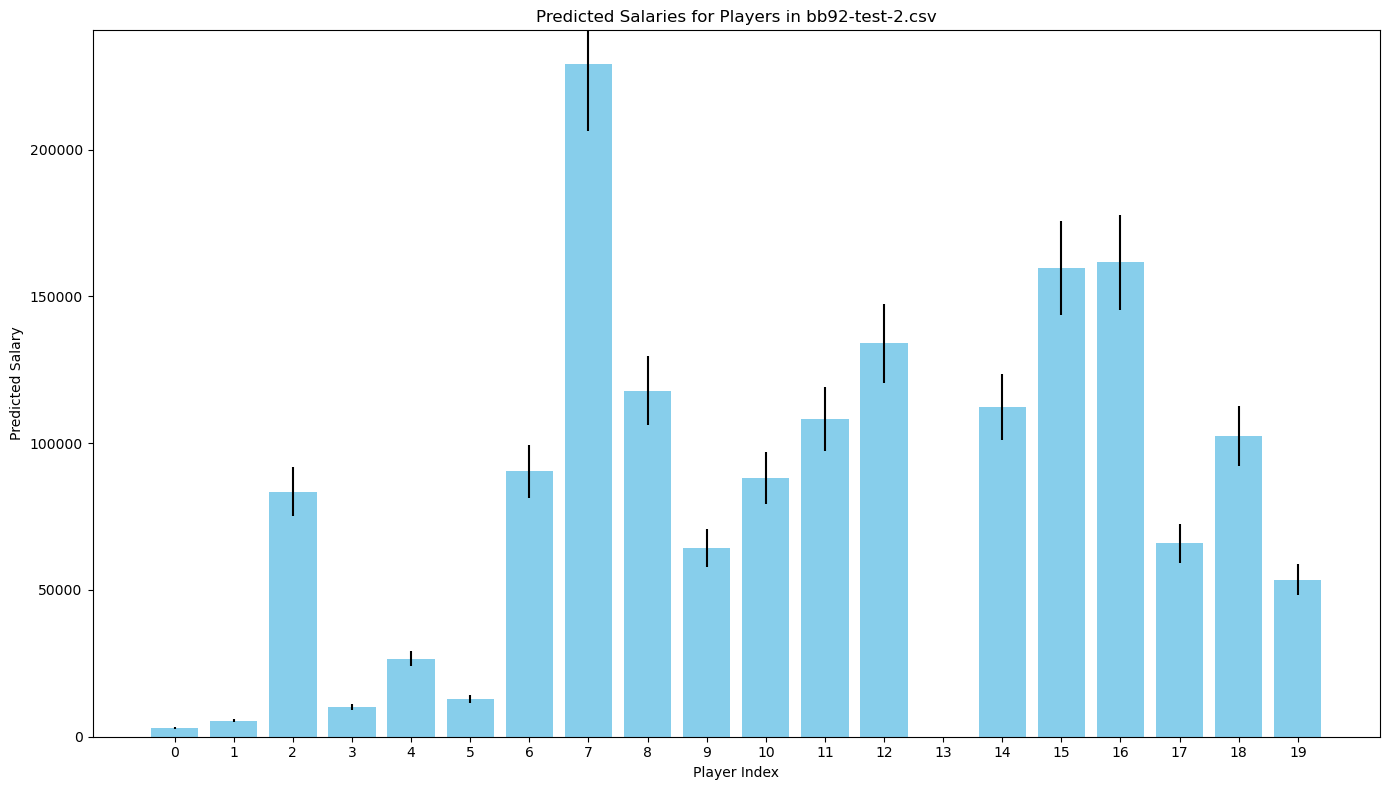

In [78]:
# Using index numbers as player identifiers
player_indexes = range(len(new_data))

plt.figure(figsize=(14, 8))
plt.bar(player_indexes, salary_pred, color='skyblue', yerr=0.1 * salary_pred)
# Assuming a 10% error for demonstration
plt.xlabel('Player Index')
plt.ylabel('Predicted Salary')
plt.title('Predicted Salaries for Players in bb92-test-2.csv')
plt.xticks(ticks=player_indices)
plt.tight_layout()
plt.show()

The highest predicted salary among all belongs to the Player indexed at 7. Most of the players have predicted
salaries in a similar range, with a few outliers (like the players indexed at 7, 15, and 16). These players have 
notably higher predicted salaries.
